## Adaptation and Learning HW2 Q6

#### Initial setting

In [1]:
# import libraries
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
from tqdm import tqdm

In [87]:
# set parameters
params = {
    'rho': 1.0,
    'mu':0.01,
    'mu_ag':1,
    'M': 10,
    'N': 250,
    'maxit': 2000,
    'w_gt': np.random.randn(10),
    'w_init': np.random.randn(10),
    'beta': 0.95,
    'beta1': 0.9,
    'beta2': 0.999,
    'epsilon': 10**-8
}

In [3]:
# create data set
h = np.random.randn(params['M'],params['N'])
gamma = 1 / (1 + np.exp(-np.transpose(h)@params['w_gt']))
gamma = (gamma > 0.5)*2.0 -1.0

#### Define required functions

In [4]:
def risk_logistic(w, gamma, h, params):
    return params['rho']*linalg.norm(w)**2 + np.log(1 + np.exp(-gamma*(np.transpose(h)@w)))

In [5]:
def Pw(w, gamma, h, params):
    return 1/params['N'] * sum(risk_logistic(w, gamma, h, params))

In [6]:
def grad_logistic(w, gamma_m, h_m, params):
    return 2*params['rho']*w - gamma_m*h_m / (1 + np.exp(gamma_m*h_m@w))

In [7]:
def adam(gamma, h, params):
#     np.random.seed(seed=1)
    beta1 = params['beta1']
    beta2 = params['beta2']
    epsilon = params['epsilon']
    bn_bar = np.zeros(params['M'])
    sn = np.zeros(params['M'])
    wn = params['w_init']
    loss = []
    for i in range(params['maxit']):
        loss.append(Pw(wn, gamma, h, params))
        j = np.random.randint(params['N'])
        bn = grad_logistic(wn, gamma[j], h[:,j], params)
        bn_bar = beta1*bn_bar + (1-beta1)*bn
        sn = beta2*sn + (1-beta2)*bn**2
        An = np.diag(np.sqrt(sn)) + epsilon*np.eye(params['M'])
        wn = wn - params['mu'] * (np.sqrt(1 - beta2**(i+1)) / (1 - beta1**(i+1))) * linalg.inv(An)@bn_bar
    return loss

In [8]:
loss_adam = adam(gamma,h,params)

0.6645454168750958


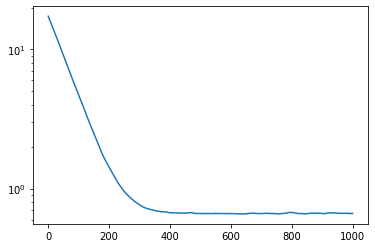

In [9]:
# check convergence with the algorithm
x = range(params['maxit'])
loss = loss_adam
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

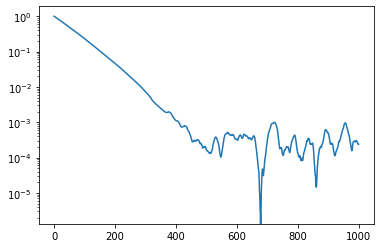

In [323]:
x = range(params['maxit'])
loss = loss_adam
y = abs(loss-min(loss)) / (max(loss)-min(loss))
plt.plot(x,y)
plt.yscale('log')
plt.show()

In [10]:
def AdaGrad(gamma, h, params):
#     np.random.seed(seed=1)
    epsilon = params['epsilon']
    sn = np.zeros(params['M'])
    wn = params['w_init']
    loss = []
    for i in range(params['maxit']):
        loss.append(Pw(wn, gamma, h, params))        
        j = np.random.randint(params['N'])
        bn = grad_logistic(wn, gamma[j], h[:,j], params)
        sn = sn + bn**2
        An = np.diag(np.sqrt(sn)) + epsilon*np.eye(params['M'])
        wn = wn - params['mu_ag'] * linalg.inv(An)@bn
    return loss

In [11]:
loss_AdaGrad = AdaGrad(gamma,h,params)

0.7209185078632236


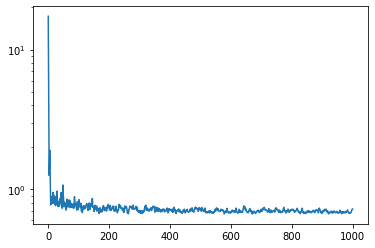

In [12]:
# check convergence with the algorithm 
x = range(params['maxit'])
loss = loss_AdaGrad
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

In [79]:
def AdaDelta(gamma, h, params):
#     np.random.seed(seed=1)
    beta = params['beta']
    epsilon = params['epsilon']
    sn = np.zeros(params['M'])
    deltan = np.zeros(params['M'])
    wn = params['w_init']
    loss = []
    for i in tqdm(range(params['maxit'])):
        loss.append(Pw(wn, gamma, h, params))
        j = np.random.randint(params['N'])
        bn = grad_logistic(wn, gamma[j], h[:,j], params)
        sn = beta*sn + (1-beta)*bn**2
        Dn = np.diag(np.sqrt(deltan)) + epsilon*np.eye(params['M'])
        An = np.diag(np.sqrt(sn)) + epsilon*np.eye(params['M'])
        wn = wn - Dn@linalg.inv(An)@bn
        Deltan = -  Dn@linalg.inv(An)@bn
        deltan = beta*deltan + (1-beta)*Deltan**2
    return loss

In [80]:
loss_AdaDelta = AdaDelta(gamma,h,params)

100%|██████████| 1000/1000 [00:00<00:00, 4007.58it/s]


17.305054680484584


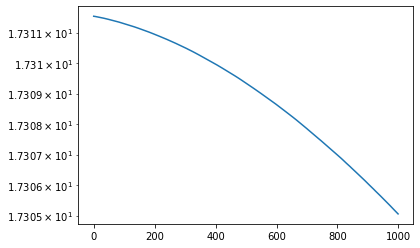

In [81]:
# check convergence with the algorithm
x = range(params['maxit']*2)
loss = loss_AdaDelta
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x[:1000],y[:1000])
plt.yscale('log')
plt.show()

In [16]:
def AdaMax(gamma, h, params):
#     np.random.seed(seed=1)
    beta1 = params['beta1']
    beta2 = params['beta2']
    epsilon = params['epsilon']
    bn_bar = np.zeros(params['M'])
    un = np.zeros(params['M'])
    wn = params['w_init']
    loss = []
    for i in range(params['maxit']):
        loss.append(Pw(wn, gamma, h, params))
        j = np.random.randint(params['N'])
        bn = grad_logistic(wn, gamma[j], h[:,j], params)
        bn_bar = beta1*bn_bar + (1-beta1)*bn
        un = np.maximum(beta2*un, abs(bn))
        An = np.diag(np.sqrt(un)) + epsilon*np.eye(params['M'])
        wn = wn - params['mu'] / (1 - beta1**(i+1)) * linalg.inv(An)@bn_bar
    return loss

In [17]:
loss_AdaMax = AdaMax(gamma,h,params)

0.6624232323824378


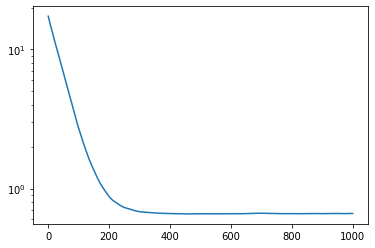

In [18]:
# check convergence with the algorithm
x = range(params['maxit'])
loss = loss_AdaMax
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

In [19]:
def Nadam(gamma, h, params):
#     np.random.seed(seed=1)
    beta1 = params['beta1']
    beta2 = params['beta2']
    epsilon = params['epsilon']
    bn_bar = np.zeros(params['M'])
    sn = np.zeros(params['M'])
    wn = params['w_init']
    loss = []
    for i in range(params['maxit']):
        loss.append(Pw(wn, gamma, h, params))
        j = np.random.randint(params['N'])
        bn = grad_logistic(wn, gamma[j], h[:,j], params)
        bn_bar = beta1*bn_bar + (1-beta1)*bn
        bn_bar_dash = bn_bar / (1 - beta1**(i+1))
        bn_hat = beta1*bn_bar_dash + (1-beta1)*bn
        sn = beta2*sn + (1-beta2)*bn**2
        sn_dash = sn / (1-beta2**(i+1))
        An = np.diag(np.sqrt(sn_dash)) + epsilon*np.eye(params['M'])
        wn = wn - params['mu'] * linalg.inv(An)@bn_hat
    return loss

In [20]:
loss_Nadam = Nadam(gamma,h,params)

0.6639596776739666


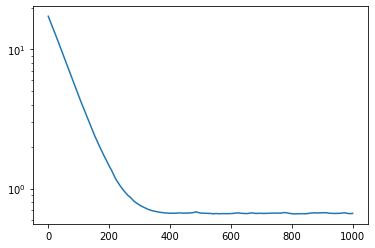

In [21]:
# check convergence with the algorithm
x = range(params['maxit'])
loss = loss_Nadam
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

In [22]:
def RMSProp(gamma, h, params):
#     np.random.seed(seed=1)
    beta = params['beta']
    epsilon = params['epsilon']
    sn = np.zeros(params['M'])
    wn = params['w_init']
    loss = []
    for i in range(params['maxit']):
        loss.append(Pw(wn, gamma, h, params))
        j = np.random.randint(params['N'])
        bn = grad_logistic(wn, gamma[j], h[:,j], params)
        sn = beta*sn + (1-beta)*bn**2
        An = np.diag(np.sqrt(sn)) + epsilon*np.eye(params['M'])
        wn = wn - params['mu']*linalg.inv(An)@bn
    return loss

In [23]:
loss_RMSProp = RMSProp(gamma,h,params)

0.6664322014343832


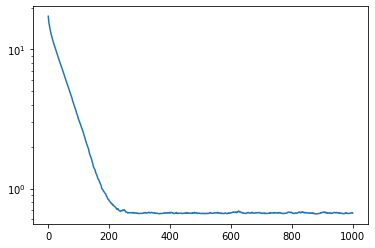

In [24]:
# check convergence with the algorithm
x = range(params['maxit'])
loss = loss_RMSProp
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

In [25]:
def sgd(gamma, h, params):
#     np.random.seed(seed=1)
    wn = params['w_init']
    loss = []
    for i in range(params['maxit']):
        loss.append(Pw(wn, gamma, h, params))        
        j = np.random.randint(params['N'])
        wn = wn - params['mu'] * grad_logistic(wn, gamma[j], h[:,j], params)
    return loss

In [26]:
loss_sgd = sgd(gamma,h,params)

0.6580100751220177


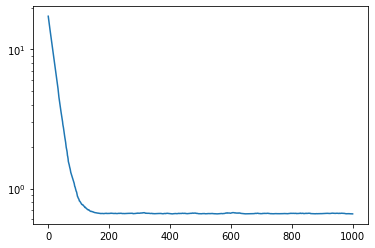

In [27]:
# check convergence with the algorithm
x = range(params['maxit'])
loss = loss_sgd
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

In [30]:
def sgd_momentum(gamma, h, params):
#     np.random.seed(seed=1)
    beta = params['beta']
    bn_bar = np.zeros(params['M'])
    wn = params['w_init']
    loss = []
    for i in range(params['maxit']):
        loss.append(Pw(wn, gamma, h, params))
        j = np.random.randint(params['N'])
        bn = grad_logistic(wn, gamma[j], h[:,j], params)
        bn_bar = beta*bn_bar + bn
        wn = wn - params['mu'] * bn_bar
    return loss

In [31]:
loss_sgd_momentum = sgd_momentum(gamma,h,params)

0.6877834967910039


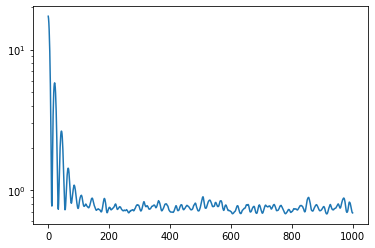

In [32]:
# check convergence with the algorithm
x = range(params['maxit'])
loss = loss_sgd_momentum
y = loss
# y = abs(loss-min(loss)) / (max(loss)-min(loss))
print(loss[-1])
plt.plot(x,y)
plt.yscale('log')
plt.show()

#### calculate loss with the algorithms and normalize the loss values

In [88]:
# normalization of the calculated loss values
loss = np.zeros((8,params['maxit']))
for i in range(10):
    loss[0,:] += np.array( abs(adam(gamma, h, params) - adam(gamma, h, params)[-1]) / (adam(gamma, h, params)[0] - adam(gamma, h, params)[-1]))/10
    loss[1,:] += np.array( abs(AdaGrad(gamma, h, params) - AdaGrad(gamma, h, params)[-1]) / (AdaGrad(gamma, h, params)[0] - AdaGrad(gamma, h, params)[-1]))/10
    loss[2,:] += np.array( abs(AdaDelta(gamma, h, params) - AdaDelta(gamma, h, params)[-1]) / (AdaDelta(gamma, h, params)[0] - AdaDelta(gamma, h, params)[-1]))/10
    loss[3,:] += np.array( abs(AdaMax(gamma, h, params) - AdaMax(gamma, h, params)[-1]) / (AdaMax(gamma, h, params)[0] - AdaMax(gamma, h, params)[-1]))/10
    loss[4,:] += np.array( abs(Nadam(gamma, h, params) - Nadam(gamma, h, params)[-1]) / (Nadam(gamma, h, params)[0] - Nadam(gamma, h, params)[-1]))/10
    loss[5,:] += np.array( abs(RMSProp(gamma, h, params) - RMSProp(gamma, h, params)[-1]) / (RMSProp(gamma, h, params)[0] - RMSProp(gamma, h, params)[-1]))/10
    loss[6,:] += np.array( abs(sgd(gamma, h, params) - sgd(gamma, h, params)[-1]) / (sgd(gamma, h, params)[0] - sgd(gamma, h, params)[-1]))/10
    loss[7,:] += np.array( abs(sgd_momentum(gamma, h, params) - sgd_momentum(gamma, h, params)[-1]) / (sgd_momentum(gamma, h, params)[0] - sgd_momentum(gamma, h, params)[-1]))/10

100%|██████████| 2000/2000 [00:00<00:00, 4513.59it/s]


#### plot the normalized loss

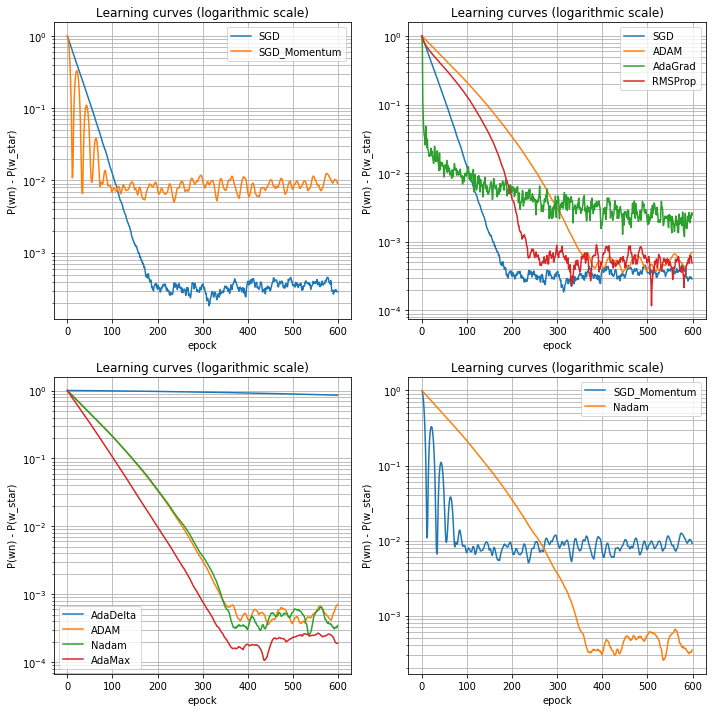

In [89]:
# plot the normalized loss
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

x = range(600)
ax1.plot(x, loss[6][:600])
ax1.plot(x, loss[7][:600])

ax2.plot(x, loss[6][:600])
ax2.plot(x, loss[0][:600])
ax2.plot(x, loss[1][:600])
ax2.plot(x, loss[5][:600])

ax3.plot(x, loss[2][:600])
ax3.plot(x, loss[0][:600])
ax3.plot(x, loss[4][:600])
ax3.plot(x, loss[3][:600])

ax4.plot(x, loss[7][:600])
ax4.plot(x, loss[4][:600])

ax1.set_xlabel("epock")
ax2.set_xlabel("epock")
ax3.set_xlabel("epock")
ax4.set_xlabel("epock")

ax1.set_ylabel("P(wn) - P(w_star)")
ax2.set_ylabel("P(wn) - P(w_star)")
ax3.set_ylabel("P(wn) - P(w_star)")
ax4.set_ylabel("P(wn) - P(w_star)")

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')

ax1.grid(True,which="both",ls="-")
ax2.grid(True,which="both",ls="-")
ax3.grid(True,which="both",ls="-")
ax4.grid(True,which="both",ls="-")

ax1.legend(['SGD','SGD_Momentum'])
ax2.legend(['SGD','ADAM','AdaGrad','RMSProp'])
ax3.legend(['AdaDelta','ADAM','Nadam','AdaMax'])
ax4.legend(['SGD_Momentum','Nadam'])

ax1.set_title('Learning curves (logarithmic scale)')
ax2.set_title('Learning curves (logarithmic scale)')
ax3.set_title('Learning curves (logarithmic scale)')
ax4.set_title('Learning curves (logarithmic scale)')

fig.tight_layout()

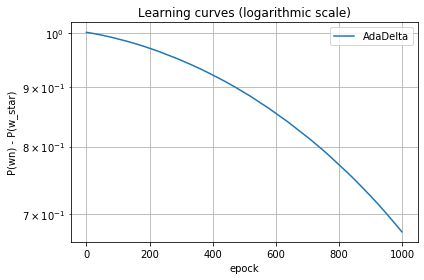

In [90]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
x = range(1000)
ax1.plot(x, loss[2][:1000])
ax1.set_xlabel("epock")
ax1.set_ylabel("P(wn) - P(w_star)")
ax1.set_yscale('log')
ax1.grid(True,which="both",ls="-")
ax1.legend(['AdaDelta'])
ax1.set_title('Learning curves (logarithmic scale)')
fig.tight_layout()

AdaDelta method converges much slower than other methods